- Exercise 1.3

Load the Yale B image database and compute the economy SVD using a standard svd command.

Now compute the SVD with the method of snapshots.

Compare the singular value spectra on a log plot.

Compare the first 10 left singular vectors using each method (remember to reshape them into the shape of a face).

Now compare a few singular vectors farther down the spectrum.

Explain your findings.

In [1]:
import scipy.io  # io: imput and output
import numpy as np
import os

In [2]:
# Load the Yale B image database
mat_contents = scipy.io.loadmat(os.path.join('..','Data','allFaces.mat'))

In [3]:
# Compute the economy SVD using a standard svd command
faces = mat_contents['faces']   # (32256, 2410)
U, S, VT = np.linalg.svd(faces, full_matrices=False)

In [15]:
faces

array([[80, 94, 59, ...,  3,  4,  4],
       [81, 87, 67, ...,  4,  4,  3],
       [80, 88, 66, ...,  2,  4,  4],
       ...,
       [14,  7,  6, ...,  0,  1,  1],
       [14,  9,  6, ...,  1,  1,  0],
       [11,  8,  7, ...,  1,  1,  2]], dtype=uint8)

In [4]:
# Compute the SVD with the method of snapshots
XstarX = faces.T @ faces
XstarX.shape

(2410, 2410)

In [16]:
XstarX

array([[171,  74, 113, ..., 234,  53, 158],
       [ 74, 149, 188, ..., 138,  89, 179],
       [113, 188, 251, ..., 206, 219, 213],
       ...,
       [234, 138, 206, ..., 134, 108, 156],
       [ 53,  89, 219, ..., 108, 147, 220],
       [158, 179, 213, ..., 156, 220, 145]], dtype=uint8)

In [5]:
S2_ss, V_ss = np.linalg.eig(XstarX)

In [6]:
print(S2_ss.shape)
print(V_ss.shape)
print(S2_ss)

(2410,)
(2410, 2410)
[3.07259945e+05 7.21580059e+03 7.20921481e+03 ... 6.95315165e+01
 2.17062577e+01 8.00042136e+01]


In [31]:
print(np.sort(S2_ss))

[ -7199.07817817  -7172.21820857  -7127.33066405 ...   7209.21481253
   7215.80058687 307259.94513471]


In [11]:
import matplotlib.pyplot as plt

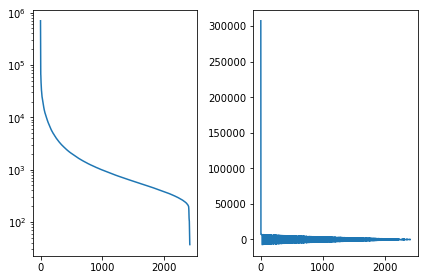

In [18]:
fig, axs = plt.subplots(1,2)
axs[0].semilogy(S)
axs[1].plot(S2_ss)

fig.tight_layout()

In [ ]:
# U_ss = faces @ V_ss @ np.diag(1/np.sqrt(S2_ss))

- Exercise 1.4

Generate a random 100 by 100 matrix, i.e., a matrix whose entries are sampled from a normal distribution.

Compute the SVD of this matrix and plot the singular values.

Repeat this 100 times and plot the distribution of singular values in a box-and-whisker plot.

Plot the mean and median singular values as a function of r.

Now repeat this for different matrix sizes (e.g., 50 by 50, 200 by 200, 500 by 500, 1000 by 1000, etc.).

In [ ]:
# Generate a random 100 by 100 matrix
# the entries are sampled from N(mu=0, sigma=1)
np.random.seed(6397)
n = 100
A = np.random.normal(0,1,(n,n))

In [ ]:
# Compute the SVD of this matrix
U, S, VT = np.linalg.svd(A, full_matrices=True)

In [ ]:
# Plot the singular values
plt.plot(S)
plt.show()

In [ ]:
# Repeat this 100 times
k = 100
S_mat = np.zeros((k,n))
for i in range(k):
    Ai = np.random.normal(0,1,(n,n))
    U, S, VT = np.linalg.svd(Ai, full_matrices=True)
    S_mat[i,:] = S

In [ ]:
# Plot the distribution of singular values in a box-and-whisker plot
plt.boxplot(S_mat.flatten())
plt.show()

In [ ]:
# Repeat this for different matrix sizes
# n = 50
n = 50
S_mat = np.zeros((k,n))
for i in range(k):
    Ai = np.random.normal(0,1,(n,n))
    U, S, VT = np.linalg.svd(Ai, full_matrices=True)
    S_mat[i,:] = S

plt.boxplot(S_mat.flatten())
plt.show()

In [ ]:
# n = 1000
n = 1000
S_mat = np.zeros((k,n))
for i in range(k):
    Ai = np.random.normal(0,1,(n,n))
    U, S, VT = np.linalg.svd(Ai, full_matrices=True)
    S_mat[i,:] = S

plt.boxplot(S_mat.flatten())
plt.show()